# First Project: Impact of Weather on Crime in Austin

In [10]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database

## Perform API Call - Austin Crime Data (data.austintexas.gov)

In [11]:
obj_crime = Crime()
json_crime = obj_crime.get_json_crime("2019-01-01T00:00:00", "2019-01-01T01:30:00")
df_crime = obj_crime.get_df_crime(json_crime)
df_crime

,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2019-01-01T00:04:00.000,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,2019-01-01T00:05:00.000,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,2019-01-01T00:05:00.000,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
3,2019-01-01T00:11:00.000,201910072,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78757,NaN,NaN,1546322400
4,2019-01-01T00:11:00.000,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
5,2019-01-01T00:16:00.000,201910101,DOC DISCHARGE GUN - PUB PLACE,2408,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78653,NaN,NaN,1546322400
6,2019-01-01T00:22:00.000,201910122,DOC DISCHARGE GUN - PUB PLACE,2408,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
7,2019-01-01T00:26:00.000,20193652065,CRASH/FAIL STOP AND RENDER AID,3604,N,2018-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78660,NaN,NaN,1546322400
8,2019-01-01T00:27:00.000,201910152,FELONY ENHANCEMENT/ASSLT W/INJ,909,Y,2019-01-01T00:00:00.000,RESIDENCE / HOME,78748,NaN,NaN,1546322400
9,2019-01-01T00:30:00.000,201910131,ASSAULT WITH INJURY,900,N,2019-01-01T00:00:00.000,BAR / NIGHT CLUB,78701,NaN,NaN,1546322400


## Perform API Call - Weather Data (Dark Sky)

In [28]:
# Remove duplicated dates
epochs = df_crime["Epoch"].drop_duplicates()

# Get set of dates to request from Dark Sky
first_day = dt.datetime.fromtimestamp(min(df_crime["Epoch"]))
last_day = dt.datetime.fromtimestamp(max(df_crime["Epoch"]))
num_days = (last_day - first_day).days
one_day = dt.timedelta(1)
timestamps = [int((first_day + i * one_day).timestamp()) for i in range(num_days + 1)]

# Get weather data in json format
json_weather = []
for timestamp in timestamps:
    json_weather.extend(obj_weather.get_json_weather(timestamp))

json_weather

[{'time': 1546322400,
  'summary': 'Clear',
  'icon': 'clear-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 41.13,
  'apparentTemperature': 41.13,
  'dewPoint': 41.13,
  'humidity': 1,
  'pressure': 1018,
  'windSpeed': 0.05,
  'windGust': 2.97,
  'windBearing': 227,
  'cloudCover': 0,
  'uvIndex': 0,
  'visibility': 4.004},
 {'time': 1546326000,
  'summary': 'Clear',
  'icon': 'clear-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 41.89,
  'apparentTemperature': 41.89,
  'dewPoint': 41.89,
  'humidity': 1,
  'pressure': 1017.6,
  'windSpeed': 2.66,
  'windGust': 2.95,
  'windBearing': 295,
  'cloudCover': 0,
  'uvIndex': 0,
  'visibility': 2.99},
 {'time': 1546329600,
  'summary': 'Clear',
  'icon': 'clear-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 43.73,
  'apparentTemperature': 40.74,
  'dewPoint': 40.96,
  'humidity': 0.9,
  'pressure': 1017.5,
  'windSpeed': 5.17,
  'windGust': 5.17,
  'windBear

In [29]:
# Create a weather object
obj_weather = Weather()

# Get the dataframe version of the given json file
df_weather = obj_weather.get_df_weather(json_weather)
df_weather

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed
0,1546322400,41.13,0.00,41.13,1.00,clear-night,0,0,1018.0,Clear,41.13,0,4.004,227,0.05
1,1546326000,41.89,0.00,41.89,1.00,clear-night,0,0,1017.6,Clear,41.89,0,2.990,295,2.66
2,1546329600,40.74,0.00,40.96,0.90,clear-night,0,0,1017.5,Clear,43.73,0,5.030,348,5.17
3,1546333200,39.88,0.30,40.12,0.91,clear-night,0,0,1018.7,Clear,42.45,0,7.723,339,4.31
4,1546336800,34.99,0.00,35.70,0.82,clear-night,0,0,1018.8,Clear,40.66,0,9.997,359,8.82
5,1546340400,37.57,0.00,36.25,0.80,clear-night,0,0,1019.1,Clear,41.99,0,9.997,350,6.93
6,1546344000,37.08,0.00,34.63,0.76,clear-night,0,0,1020.6,Clear,41.78,0,9.997,355,7.35
7,1546347600,34.20,0.00,35.31,0.83,clear-night,0,0,1022.2,Clear,40.01,0,9.997,353,8.78
8,1546351200,33.43,0.02,35.07,0.84,clear-day,0,0,1023.4,Clear,39.40,0,9.140,350,8.84
9,1546354800,35.26,1.00,36.35,0.83,cloudy,0,0,1024.3,Overcast,41.13,1,8.924,0,9.50


## Merge Data Sources (Crime and Weather Data)

In [30]:
df_result = pd.merge(df_weather, df_crime, left_on="Date", right_on="Epoch", how="right")

## Clean Data 

In [31]:
# Sorting by incident number 
# df_result.sort_values("Incident Number", inplace = True)

df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
3,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910072,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78757,NaN,NaN,1546322400
4,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
5,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910101,DOC DISCHARGE GUN - PUB PLACE,2408,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78653,NaN,NaN,1546322400
6,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910122,DOC DISCHARGE GUN - PUB PLACE,2408,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
7,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,20193652065,CRASH/FAIL STOP AND RENDER AID,3604,N,2018-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78660,NaN,NaN,1546322400
8,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910152,FELONY ENHANCEMENT/ASSLT W/INJ,909,Y,2019-01-01T00:00:00.000,RESIDENCE / HOME,78748,NaN,NaN,1546322400
9,1546322400,41.13,0.0,41.13,1.0,clear-night,0,0,1018.0,Clear,...,201910131,ASSAULT WITH INJURY,900,N,2019-01-01T00:00:00.000,BAR / NIGHT CLUB,78701,NaN,NaN,1546322400


# Store in a database

In [15]:
# obj_database = Database()
# obj_database.df_save(df_result)

## Plotting Part 1 - Crime Type vs. Weather Variables 

#### Crime Type vs. Temperature

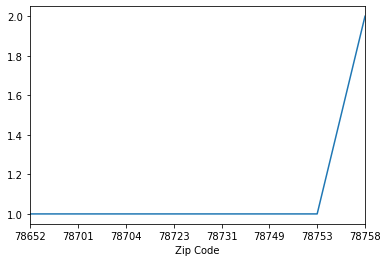

In [21]:
# Just an example
df_plot1 = df_result.groupby(["Zip Code"])["Incident Number"].count()
df_plot1.plot()

#### Crime Type vs. Atmospheric Pressure

#### Crime Type vs. Humidity

#### Crime Type vs. Moon Phase

## Plotting Part 2 - Crime Location Type vs. Weather Variables 

#### Crime Location Type vs. Temperature

#### Crime Location Type vs. Atmospheric Pressure

#### Crime Location Type vs. Humidity

#### Crime Location Type vs. Moon Phase 

## Written Analysis and Conclusions